# Data preparation

### Imports

In [2]:
import pandas as pd
from tqdm import tqdm
import re
import statistics
import matplotlib.pyplot as plt
from langdetect import detect
import random

### Data loading and concatination

In [3]:
df1 = pd.read_csv(r"data_cleaned/data_final2_lang_clean.csv")
df2 = pd.read_csv(r"data_cleaned/data_final.csv")

In [12]:
print(f"Nb of rows in df1: {len(df1.index)}")
print(f"Nb of rows in df2: {len(df2.index)}")

Nb of rows in df1: 82861
Nb of rows in df2: 1166302


### Drop non english songs

In [7]:
def detect_lang(x):
    try:
        lang = detect(str(x["lyrics"]))
    except Exception as e:
        return ""
    
    return lang

In [9]:
df2["lang"] = df2.apply(lambda x: detect_lang(x), axis=1)

In [10]:
df2 = df2.drop(df2[df2["lang"] != "en"].index)
df2 = df2.drop("lang", axis=1)
df2.to_csv(r"data_cleaned/data_final_lang_cleaned.csv", index=False)

### Check columns and concat

In [15]:
df1.head()

,artist,track,genre,lyrics
0,Cheryl,Rain on Me,pop,Rain On Me Lyrics It's a sunny day So I got no...
1,Blue Öyster Cult,ME 262,"hard rock,rock,classic rock","ME 262 Lyrics Says: ""Willie's done quite a jo..."
2,Rhapsody,Flames of Revenge,"symphonic metal,power metal,symphonic power metal",Flames of Revenge Lyrics My princess why must ...
3,The Chameleons,Nostalgia,"post-punk,new wave",Nostalgia LyricsAbsorbing your words Battles r...
4,Atlas Sound,Criminals,"indie rock,experimental,shoegaze,experimental",Criminals LyricsThis criminal Walked into my r...


In [11]:
df2.head()

,track,genre,artist,lyrics
0,Killa Cam,rap,Cam'ron,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,"Yeah, hah, yeah, Roc-A-Fella We invite you t..."
2,Forgive Me Father,rap,Fabolous,Maybe cause I'm eatin And these bastards fiend...
3,Down and Out,rap,Cam'ron,"Ugh, Killa! Baby! Kanye, this that 1970s Her..."
4,Fly In,rap,Lil Wayne,"So they ask me ""Young boy What you gon' do th..."


In [14]:
df1 = df1.drop("album", axis=1)

In [16]:
df = pd.concat([df1, df2], ignore_index=True)

In [24]:
print(f"Nb of rows in df concatinated: {len(df.index)}")

Nb of rows in df concatinated: 1249163


In [19]:
# df.to_csv(r"data_cleaned/data_final_lang_cleaned.csv", index=False)

## Now some cleaning

### Useful functions

In [3]:
def apply_drop_small_genres(genres_row, number=2000):
    new_genres = []
    
    for genre in genres_row.split(","):
        if genres[genre] >= number:
            new_genres.append(genre)
            
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres)


def erase_common_genres(df, genre_threshold=50_000, sample=0.1, nb_of_genres=[1, 5, 6, 7, 8, 9, 10]):
    new_genres = []
    
    for genre in df["genre"].split(","):
        if genres[genre] > genre_threshold and random.random() < (genres[genre]*sample/max(genres.values())) and df["nb_of_genres"] in nb_of_genres:
            continue
        else:
            new_genres.append(genre)
    
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres)
    

def get_new_genres(df):
    genres = dict()
    
    for row in df.genre:
        for item in row.split(","):
            if item in genres:
                genres[item] += 1
            else:
                genres[item] = 1
    return genres


def unique_genres(df):
    unique_genres = set()

    for row in df.genre:
        for item in row.split(","):
            unique_genres.add(item)
        
    print(f"Number of unique genres: {len(unique_genres)}")


def plot_hist(df):
    genres = get_new_genres(df)

    plt.figure(dpi=250)
    plt.bar(genres.keys(), genres.values())
    plt.title("Number of genre occurances")
    plt.ylabel ('Number of occurances')
    plt.xlabel ('Genre')
    plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
    plt.show()

### Firstly check, change and clean genres names

In [23]:
df.head()

,artist,track,genre,lyrics
0,Cheryl,Rain on Me,pop,Rain On Me Lyrics It's a sunny day So I got no...
1,Blue Öyster Cult,ME 262,"hard rock,rock,classic rock","ME 262 Lyrics Says: ""Willie's done quite a jo..."
2,Rhapsody,Flames of Revenge,"symphonic metal,power metal,symphonic power metal",Flames of Revenge Lyrics My princess why must ...
3,The Chameleons,Nostalgia,"post-punk,new wave",Nostalgia LyricsAbsorbing your words Battles r...
4,Atlas Sound,Criminals,"indie rock,experimental,shoegaze,experimental",Criminals LyricsThis criminal Walked into my r...


In [ ]:
unique_genres(df)
df["genre"].value_counts()

### Change separators to exclusively ","

In [28]:
df["genre"] = df["genre"].apply(lambda x: x.replace(";", ","))

In [30]:
unique_genres(df)

Number of unique genres: 727


### Drop genres with number of occurances under 100

In [34]:
df["genre"] = df["genre"].apply(lambda x: apply_drop_small_genres(x, number=100))

In [37]:
genres = get_new_genres(df)
genres

{'pop': 531589,
 'hard rock': 21733,
 'rock': 337875,
 'classic rock': 7598,
 'symphonic metal': 979,
 'power metal': 999,
 'post-punk': 2199,
 'new wave': 5656,
 'indie rock': 7205,
 'experimental': 3049,
 'shoegaze': 1478,
 'ambient': 1579,
 'easy listening': 373,
 'electronic': 11783,
 'hip hop': 21651,
 'disney': 264,
 'emo': 2264,
 'alternative rock': 7289,
 'soul': 4898,
 'downtempo': 602,
 'alternative metal': 1066,
 'rap': 207347,
 'psychedelic rock': 1057,
 'stoner rock': 460,
 'folk': 24749,
 'electropop': 2004,
 'synthpop': 2507,
 'k-pop': 988,
 'singer-songwriter': 5111,
 'art pop': 399,
 'indie pop': 3653,
 'christian rock': 290,
 'metalcore': 2102,
 'hardcore': 9393,
 'metal': 26179,
 'melodic death metal': 1048,
 'grindcore': 280,
 'nu metal': 820,
 'pop punk': 2128,
 'pop rock': 1394,
 'noise': 313,
 'lo-fi': 1770,
 'garage rock': 823,
 'punk': 6408,
 'melodic hardcore': 488,
 'funk': 3716,
 'trance': 944,
 'techno': 384,
 'house': 2754,
 'dream pop': 1679,
 'country': 

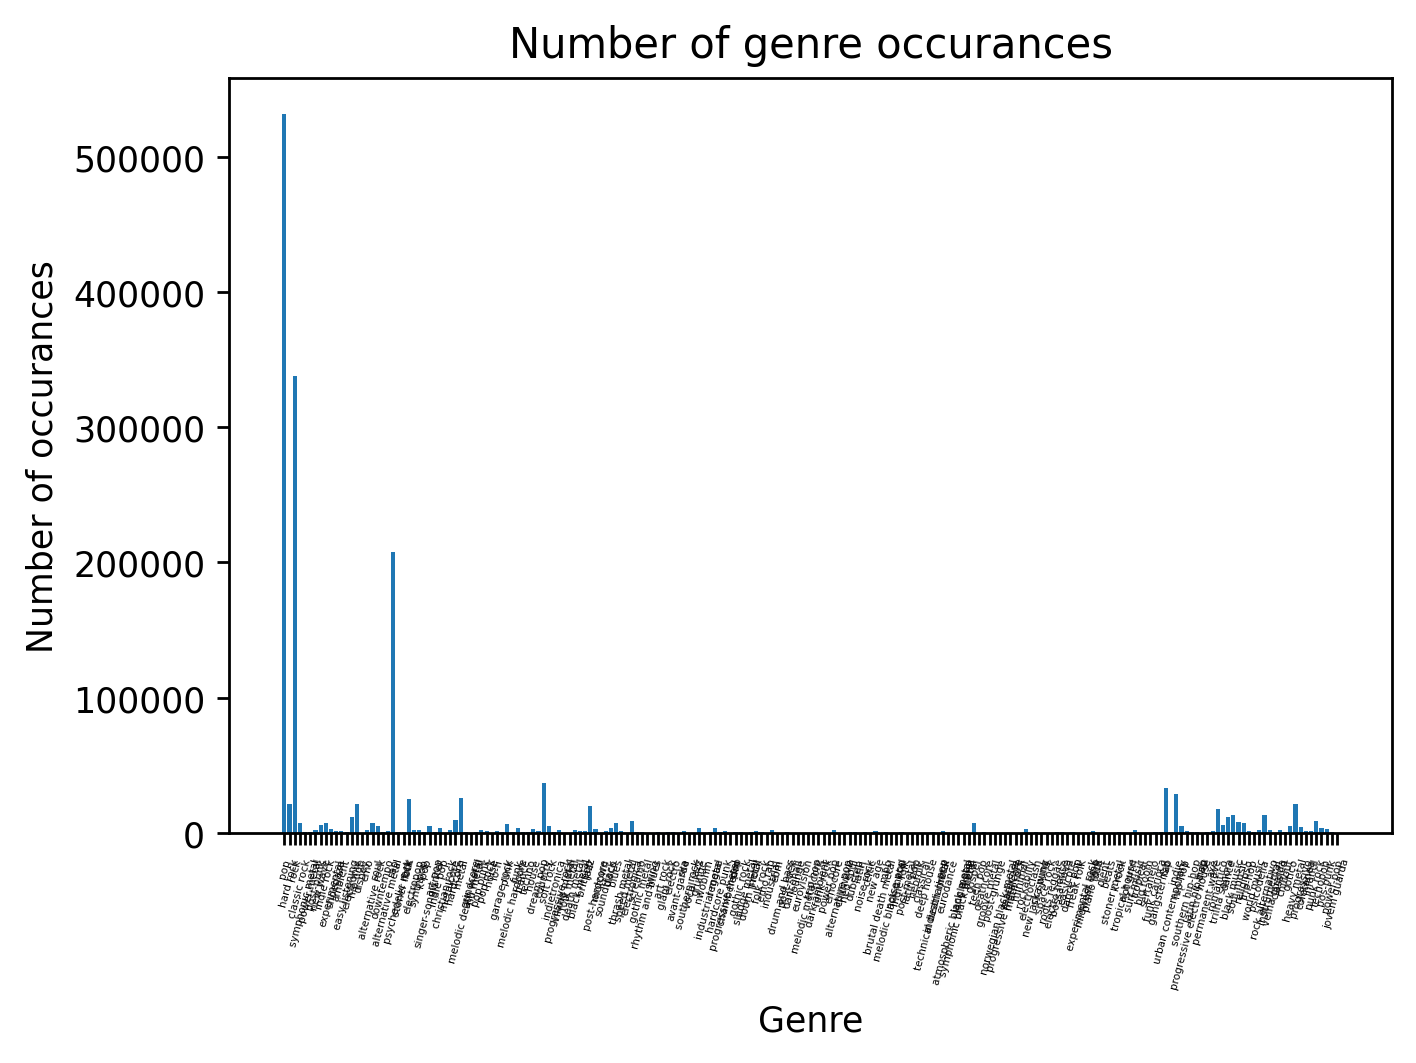

In [36]:
plot_hist(df)

### Drop all strange genres, empty genres, nan lyrics etc

In [40]:
df = df.drop(df[(df["genre"] == "") | (df["genre"] == "NAN") | (df["genre"] == "nan") | (df["lyrics"] == "") | (df["lyrics"] == "NAN") | (df["lyrics"] == "nan")].index)

In [42]:
genres_to_delete = ["motown", "jovem guarda", "velha guarda", "trilha sonora", "romântico", "axé", "sertanejo", "riot grrrl", "djent", "mpb", "nwobhm", "motown"]

def drop_genres_from_list(genres_row, list_of_genres):
    new_genres = []
    
    for genre in genres_row.split(","):
        if genre.strip() not in list_of_genres:
            new_genres.append(genre)
    
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres) 

In [43]:
df["genre"] = df["genre"].apply(lambda x: drop_genres_from_list(x, genres_to_delete))
df = df.drop(df[df["genre"] == ""].index)

In [44]:
genres = get_new_genres(df)
genres

{'pop': 531589,
 'hard rock': 21733,
 'rock': 337875,
 'classic rock': 7598,
 'symphonic metal': 979,
 'power metal': 999,
 'post-punk': 2199,
 'new wave': 5656,
 'indie rock': 7205,
 'experimental': 3049,
 'shoegaze': 1478,
 'ambient': 1579,
 'easy listening': 373,
 'electronic': 11783,
 'hip hop': 21651,
 'disney': 264,
 'emo': 2264,
 'alternative rock': 7289,
 'soul': 4898,
 'downtempo': 602,
 'alternative metal': 1066,
 'rap': 207347,
 'psychedelic rock': 1057,
 'stoner rock': 460,
 'folk': 24749,
 'electropop': 2004,
 'synthpop': 2507,
 'k-pop': 988,
 'singer-songwriter': 5111,
 'art pop': 399,
 'indie pop': 3653,
 'christian rock': 290,
 'metalcore': 2102,
 'hardcore': 9393,
 'metal': 26179,
 'melodic death metal': 1048,
 'grindcore': 280,
 'nu metal': 820,
 'pop punk': 2128,
 'pop rock': 1394,
 'noise': 313,
 'lo-fi': 1770,
 'garage rock': 823,
 'punk': 6408,
 'melodic hardcore': 488,
 'funk': 3716,
 'trance': 944,
 'techno': 384,
 'house': 2754,
 'dream pop': 1679,
 'country': 

In [45]:
# df.to_csv(r"data_cleaned/data_final_lang_cleaned.csv", index=False)

### Drop track title from beginning of the lyrics if present

In [54]:
def drop_title_annotation(df):
    if str(df["track"]).lower() in df["lyrics"][:len(str(df["track"])) + 2].lower():
        return df["lyrics"][len(str(df["track"]) + " Lyrics"):]
    return df["lyrics"]

In [55]:
df["lyrics"] = df.apply(lambda x: drop_title_annotation(x), axis=1)

In [56]:
df.head()

,artist,track,genre,lyrics
0,Cheryl,Rain on Me,pop,It's a sunny day So I got nowhere to hide Not...
1,Blue Öyster Cult,ME 262,"hard rock,rock,classic rock","Says: ""Willie's done quite a job"" Says: ""I'..."
2,Rhapsody,Flames of Revenge,"symphonic metal,power metal",My princess why must I assist at your death I...
3,The Chameleons,Nostalgia,"post-punk,new wave",Absorbing your words Battles raging within me ...
4,Atlas Sound,Criminals,"indie rock,experimental,shoegaze,experimental",This criminal Walked into my room He asked me ...


In [57]:
# df.to_csv(r"data_cleaned/data_final_lang_cleaned.csv", index=False)

### Prapare dataset for classification with small number of labels

In [59]:
unique_genres(df)

genres = get_new_genres(df)
genres

Number of unique genres: 192


{'pop': 531589,
 'hard rock': 21733,
 'rock': 337875,
 'classic rock': 7598,
 'symphonic metal': 979,
 'power metal': 999,
 'post-punk': 2199,
 'new wave': 5656,
 'indie rock': 7205,
 'experimental': 3049,
 'shoegaze': 1478,
 'ambient': 1579,
 'easy listening': 373,
 'electronic': 11783,
 'hip hop': 21651,
 'disney': 264,
 'emo': 2264,
 'alternative rock': 7289,
 'soul': 4898,
 'downtempo': 602,
 'alternative metal': 1066,
 'rap': 207347,
 'psychedelic rock': 1057,
 'stoner rock': 460,
 'folk': 24749,
 'electropop': 2004,
 'synthpop': 2507,
 'k-pop': 988,
 'singer-songwriter': 5111,
 'art pop': 399,
 'indie pop': 3653,
 'christian rock': 290,
 'metalcore': 2102,
 'hardcore': 9393,
 'metal': 26179,
 'melodic death metal': 1048,
 'grindcore': 280,
 'nu metal': 820,
 'pop punk': 2128,
 'pop rock': 1394,
 'noise': 313,
 'lo-fi': 1770,
 'garage rock': 823,
 'punk': 6408,
 'melodic hardcore': 488,
 'funk': 3716,
 'trance': 944,
 'techno': 384,
 'house': 2754,
 'dream pop': 1679,
 'country': 

In [62]:
genres_to_change = {'rock': 'rock',
                    'pop': 'pop',
                    'metal': 'metal',
                    'punk': 'punk',
                    'experimental': 'experimental',
                    'rap': 'rap',
                    'electronic': 'electronic',
                    'r&b': 'r&b',
                    'folk': 'folk',
                    'country': 'country',
                    'jazz': 'jazz',
                    'classical': 'classical',
                    'hard rock': 'rock',
                    'classic rock': 'rock',
                    'symphonic metal': 'metal',
                    'power metal': 'metal',
                    'post-punk': 'punk',
                    'new wave': 'punk',
                    'indie rock': 'rock',
                    'shoegaze': 'experimental',
                    'ambient': 'experimental',
                    'hip hop': 'rap',
                    'disney': 'experimental',
                    'emo': 'experimental',
                    'alternative rock': 'rock',
                    'soul': 'r&b',
                    'downtempo': 'electronic',
                    'alternative metal': 'metal',
                    'psychedelic rock': 'rock',
                    'stoner rock': 'rock',
                    'electropop': 'electronic',
                    'synthpop': 'pop',
                    'k-pop': 'pop',
                    'singer-songwriter': 'folk',
                    'art pop': 'pop',
                    'indie pop': 'pop',
                    'christian rock': 'rock',
                    'metalcore': 'metal',
                    'hardcore': 'metal',
                    'melodic death metal': 'metal',
                    'grindcore': 'metal',
                    'nu metal': 'metal',
                    'pop punk': 'punk',
                    'pop rock': 'rock',
                    'noise': 'experimental',
                    'lo-fi': 'experimental',
                    'garage rock': 'rock',
                    'melodic hardcore': 'metal',
                    'funk': 'r&b',
                    'trance': 'electronic',
                    'techno': 'electronic',
                    'house': 'electronic',
                    'dream pop': 'pop',
                    'soft rock': 'rock',
                    'indietronica': 'electronic',
                    'progressive rock': 'rock',
                    'viking metal': 'metal',
                    'folk metal': 'metal',
                    'death metal': 'metal',
                    'black metal': 'metal',
                    'britpop': 'pop',
                    'post-hardcore': 'experimental',
                    'soundtrack': 'experimental',
                    'disco': 'electronic',
                    'blues': 'r&b',
                    'thrash metal': 'metal',
                    'speed metal': 'metal',
                    'electronica': 'electronic',
                    'screamo': 'metal',
                    'gothic metal': 'metal',
                    'rhythm and blues': 'r&b',
                    'swing': 'jazz',
                    'art rock': "rock",
                    'glam rock': "rock",
                    'electro': 'electronic',
                    'avant-garde': 'experimental',
                    'southern rock': 'rock',
                    'vocal jazz': 'jazz',
                    'grunge': 'rock',
                    'industrial metal': 'metal',
                    'reggae': 'r&b',
                    'hardcore punk': 'punk',
                    'progressive metal': 'metal',
                    'chamber pop': 'pop',
                    'edm': 'electronic',
                    'gothic rock': 'rock',
                    'sludge metal': 'metal',
                    'doom metal': 'metal',
                    'j-rock': 'rock',
                    'folk rock': 'folk',
                    'emo rap': 'rap',
                    'industrial': 'experimental',
                    'ebm': 'electronic',
                    'drum and bass': 'electronic',
                    'post-rock': 'experimental',
                    'dancehall': 'electronic',
                    'lounge': 'experimental',
                    'eurovision': 'pop',
                    'melodic metalcore': 'metal',
                    'trip hop': 'electronic',
                    'dark ambient': 'electronic',
                    'funk rock': 'rock',
                    'power pop': 'pop',
                    'emocore': 'metal',
                    'alternative pop': 'pop',
                    'chillwave': 'electronic',
                    'neo soul': 'r&b',
                    'dubstep': 'electronic',
                    'latin': 'folk',
                    'noise rock': 'experimental',
                    'celtic': 'folk',
                    'new age': 'electronic',
                    'brutal death metal': 'metal',
                    'melodic black metal': 'metal',
                    'noise pop': 'pop',
                    'indie folk': 'folk',
                    'post-metal': 'metal',
                    'latin pop': 'pop',
                    'neofolk': 'folk',
                    'classical': 'classical',
                    'deep house': 'electronic',
                    'technical death metal': 'metal',
                    'industrial rock': 'rock',
                    'j-pop': 'pop',
                    'eurodance': 'electronic',
                    'atmospheric black metal': 'metal',
                    'symphonic black metal': 'metal',
                    'jangle pop': 'pop',
                    'drone': 'experimental',
                    'gospel': 'r&b',
                    'teen pop': 'pop',
                    'deathcore': 'metal',
                    'groove metal': 'metal',
                    'post-grunge': 'experimental',
                    'norwegian black metal': 'metal',
                    'progressive metalcore': 'metal',
                    'math rock': 'rock',
                    'minimal': 'experimental',
                    'rockabilly': "rock",
                    'new jack swing': 'jazz',
                    'ska punk': 'punk',
                    'space rock': 'rock',
                    'roots reggae': 'r&b',
                    'electro house': 'electronic',
                    'bossa nova': 'jazz',
                    'easycore': 'electronic',
                    'dance pop': 'pop',
                    'freak folk': 'folk',
                    'experimental rock': 'experimental',
                    'piano rock': 'rock',
                    'dub': 'electronic',
                    'beats': 'electronic',
                    'stoner metal': 'metal',
                    'k-rock': 'rock',
                    'tropical house': 'electronic',
                    'surf music': 'rock',
                    'tropical': 'electronic',
                    'big room': 'electronic',
                    'gangster rap': 'rap',
                    'urban contemporary': 'experimental',
                    'hip-hop': 'rap',
                    'southern hip-hop': 'rap',
                    'progressive electro house': 'electronic',
                    'latin hip-hop': 'rap',
                    'trap': 'rap',
                    'dance': 'electronic',
                    'black music': 'r&b',
                    'soul music': 'r&b',
                    'religioso': 'experimental',
                    'trip-hop': 'electronic',
                    'world music': 'folk',
                    'psicodelia': 'experimental',
                    'rock alternativo': 'rock',
                    'instrumental': 'experimental',
                    'clássico': 'classical',
                    'chillout': 'electronic',
                    'gótico': 'metal',
                    'heavy metal': 'metal',
                    'progressivo': 'rock',
                    'infantil': 'experimental',
                    'punk rock': 'rock',
                    'tecnopop': 'pop',
                    'pós-punk': 'punk',
                    'power-pop': 'pop'}


def change_genres_from_dict(genres_row, genres_to_change):
    new_genres = set()
    
    for genre in genres_row.split(","):
        if genre.strip() in list(genres_to_change.keys()):
            new_genres.add(genres_to_change[genre.strip()])
    
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres) 

In [63]:
df["genre"] = df["genre"].apply(lambda x: change_genres_from_dict(x, genres_to_change))
df = df.drop(df[df["genre"] == ""].index)

In [64]:
unique_genres(df)

genres = get_new_genres(df)
genres

Number of unique genres: 12


{'pop': 531538,
 'rock': 355324,
 'metal': 62931,
 'punk': 16929,
 'experimental': 27937,
 'electronic': 38490,
 'rap': 221880,
 'r&b': 67590,
 'folk': 28206,
 'country': 36955,
 'jazz': 21074,
 'classical': 2274}

In [65]:
df.head()

,artist,track,genre,lyrics
0,Cheryl,Rain on Me,pop,It's a sunny day So I got nowhere to hide Not...
1,Blue Öyster Cult,ME 262,rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
2,Rhapsody,Flames of Revenge,metal,My princess why must I assist at your death I...
3,The Chameleons,Nostalgia,punk,Absorbing your words Battles raging within me ...
4,Atlas Sound,Criminals,"experimental,rock",This criminal Walked into my room He asked me ...


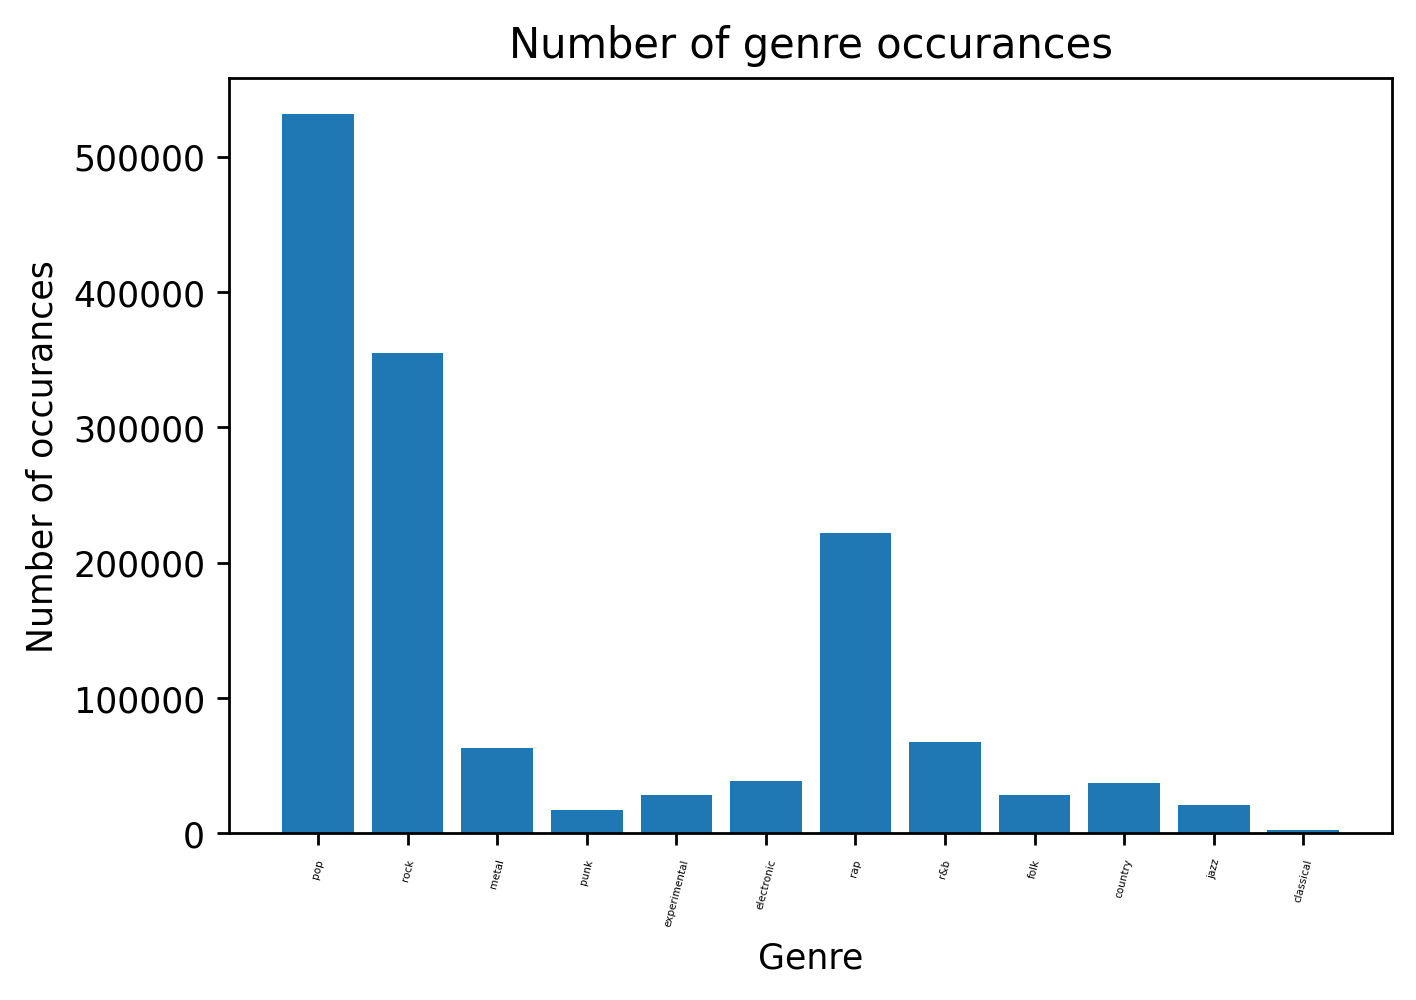

In [66]:
plot_hist(df)

In [67]:
# df.to_csv(r"data_cleaned/data_12labels_unbalanced.csv", index=False)

## Now some balancing of data

### Firstly let's filter out short lyrics

In [75]:
df["lyrics_len"] = df["lyrics"].apply(lambda x: len(x.split(" ")))

<AxesSubplot:>

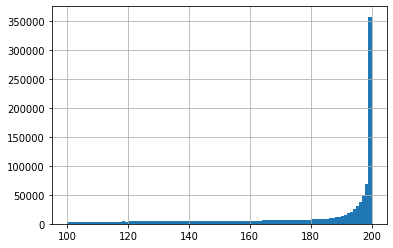

In [76]:
df["lyrics_len"].hist(bins=100)

In [73]:
df = df.drop(df[df["lyrics_len"] < 100].index)

In [89]:
# df.to_csv(r"data_cleaned/data_12labels_unbalanced.csv", index=False)

In [48]:
# df = pd.read_csv(r"data_cleaned/data_12labels_unbalanced.csv")

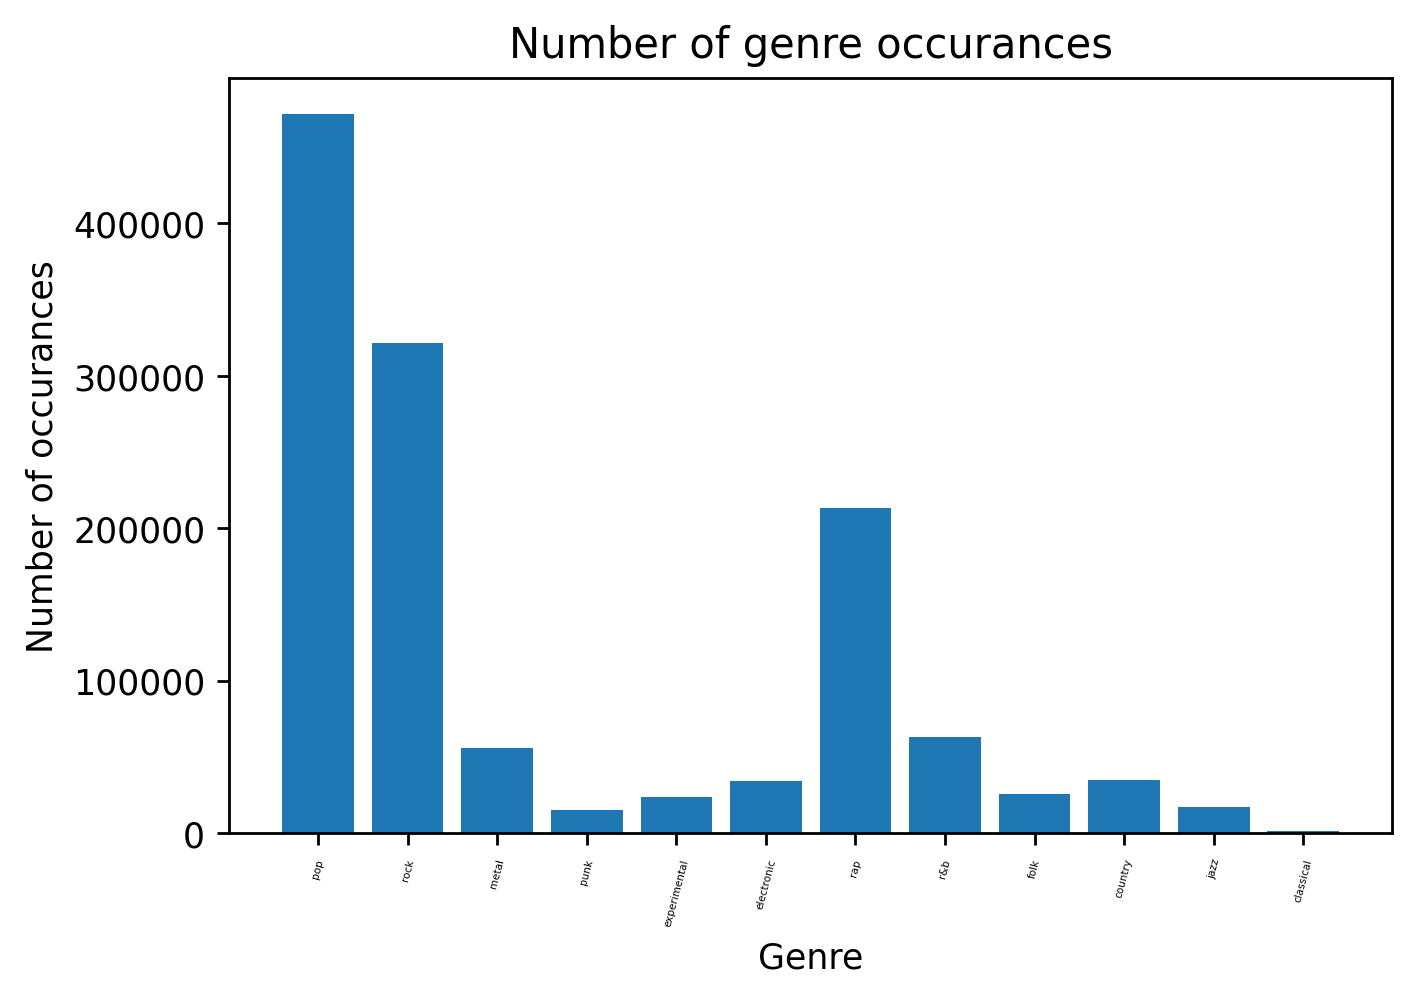

In [49]:
plot_hist(df)

## Balancing for multilabeling

In [42]:
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)

In [43]:
# df["genre"].groupby(df["nb_of_genres"]).value_counts()
df["nb_of_genres"].value_counts()

1    983602
2    102181
3     25938
4      3005
5       172
Name: nb_of_genres, dtype: int64

In [44]:
df.head()

,artist,track,genre,lyrics,lyrics_len,nb_of_genres
0,Cheryl,Rain on Me,pop,It's a sunny day So I got nowhere to hide Not...,147,1
1,Blue Öyster Cult,ME 262,rock,"Says: ""Willie's done quite a job"" Says: ""I'...",163,1
2,Rhapsody,Flames of Revenge,metal,My princess why must I assist at your death I...,172,1
3,The Chameleons,Nostalgia,punk,Absorbing your words Battles raging within me ...,192,1
4,Atlas Sound,Criminals,"experimental,rock",This criminal Walked into my room He asked me ...,113,2


### Cutting on 50k songs per genre where number of genres if equal to 1, 4 or 5

In [83]:
genres = get_new_genres(df)
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)
            
# df["genre"] = df.apply(lambda x: erase_common_genres(x, genre_threshold=50_000, sample=0.5, nb_of_genres=[1, 4, 5]), axis=1)
df["genre"] = df.apply(lambda x: erase_common_genres(x, genre_threshold=40_000, sample=0.2, nb_of_genres=[1, 3, 4, 5]), axis=1)

df = df.drop(df[df["genre"] == ""].index)

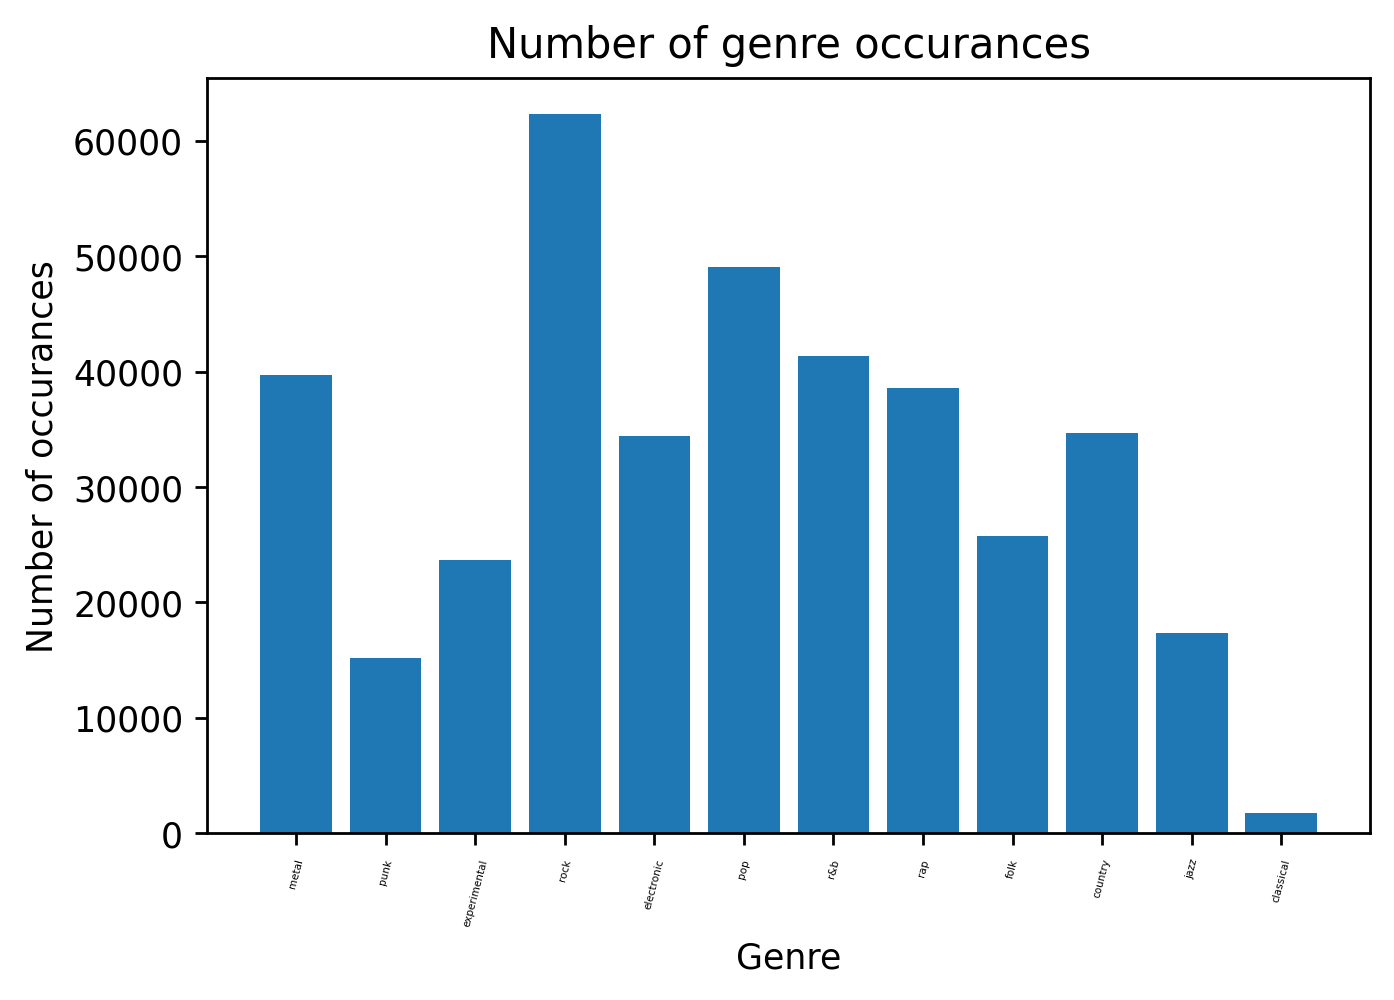

In [84]:
plot_hist(df)

In [85]:
genres = get_new_genres(df)
genres

{'metal': 39660,
 'punk': 15185,
 'experimental': 23630,
 'rock': 62298,
 'electronic': 34382,
 'pop': 49060,
 'r&b': 41324,
 'rap': 38568,
 'folk': 25777,
 'country': 34700,
 'jazz': 17317,
 'classical': 1719}

### Have to drop classical unfortunately

In [86]:
df = df.drop(df[df["genre"].apply(lambda x: "classical" in x)].index)

### Save dataset

In [183]:
# df.to_csv(r"data_cleaned/data_12labels_mulitlabel.csv", index=False)

### Drop songs with common genres

In [87]:
def drop_songs_with_common_genres(df, genre_threshold=50_000, sample=0.1, nb_of_genres=[1, 5, 6, 7, 8, 9, 10]):
    
    for genre in df["genre"].split(","):
        if genres[genre] > genre_threshold and random.random() < (genres[genre]*sample/max(genres.values())) and df["nb_of_genres"] in nb_of_genres:
            return True
    
    return False

In [101]:
genres = get_new_genres(df)
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)

df = df.drop(df[df.apply(lambda x: drop_songs_with_common_genres(x, genre_threshold=25_000, sample=0.1, nb_of_genres=[1, 2, 3, 4, 5]), axis=1)].index)

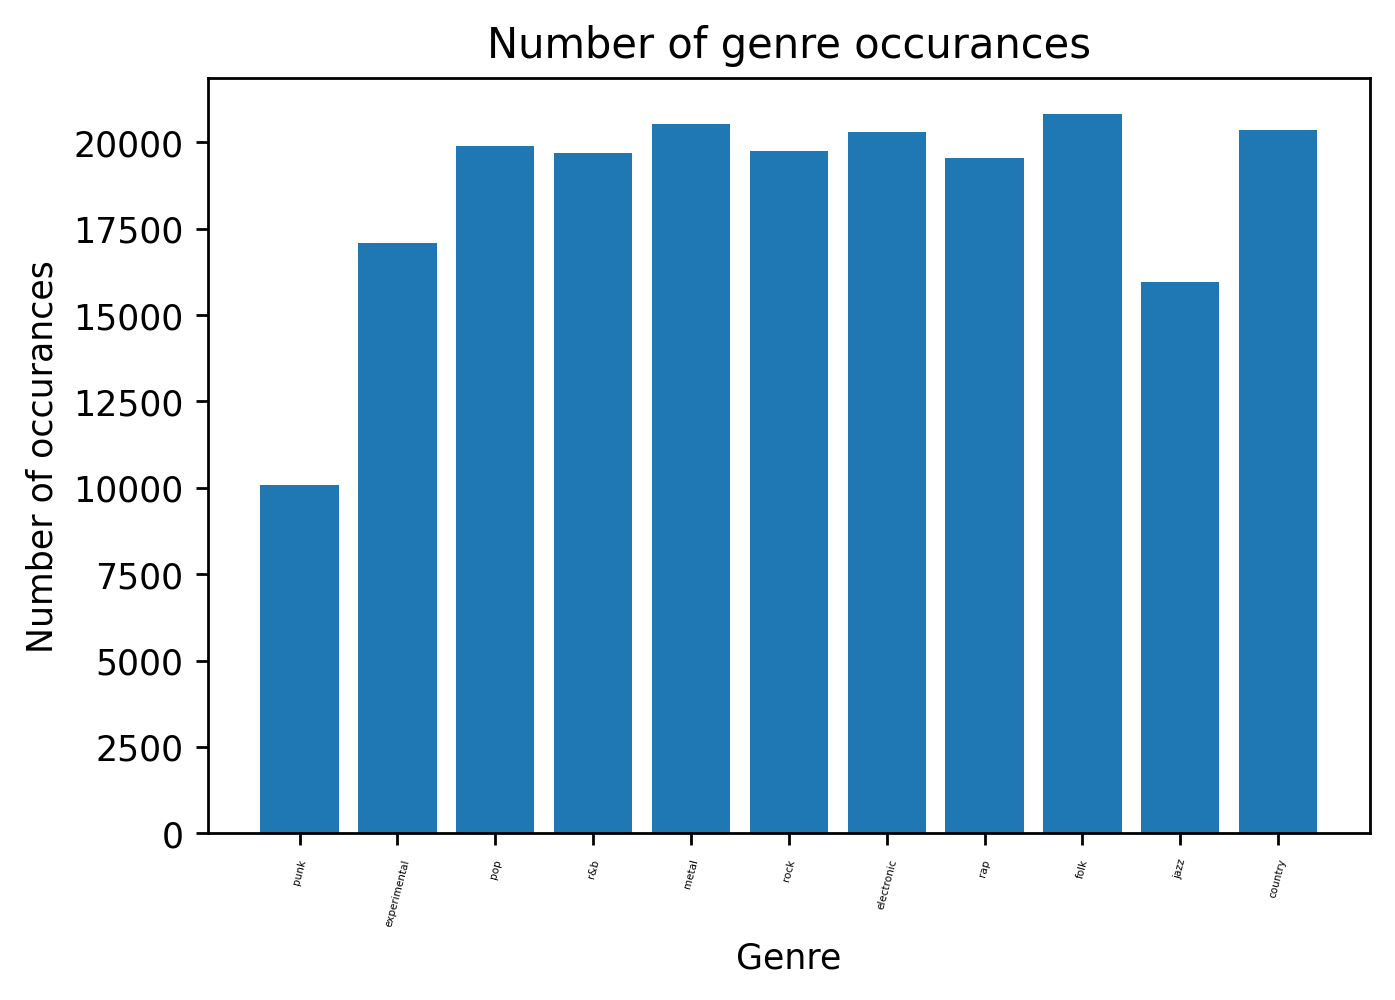

In [102]:
plot_hist(df)

In [103]:
df.to_csv(r"data_cleaned/data_12labels_mulitlabel2.csv", index=False)